Question: Explain the concept of deep learning?


Your Answer:  well neural, and deep


Correct Answer (Extracted): https://aws.amazon.com/what-is/deep-learning/...
Your Readiness Score: 9.87%


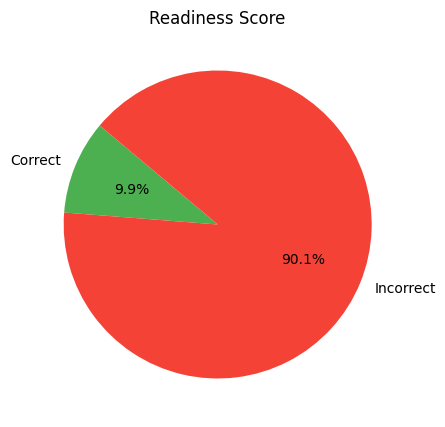

In [4]:
import random
import requests
import os
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from serpapi import GoogleSearch
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def get_random_question():
    questions = [
        "What is machine learning?",
        "Explain the concept of deep learning?",
        "What are the types of neural networks?",
        "Define supervised learning?",
        "What is the purpose of backpropagation?"
    ]
    return random.choice(questions)

def scrape_answer(question):
    api_key = os.getenv("SERPAPI_KEY")
    params = {
        "q": question,
        "api_key": api_key,
        "num": 1
    }
    
    search = GoogleSearch(params)
    results = search.get_dict()

    for result in results.get("organic_results", []):
        url = result.get("link")
        return url  # Return the first search result URL
    
    return "No answer found."

def evaluate_answer(student_answer, correct_answer):
    vectorizer = TfidfVectorizer()
    vectors = vectorizer.fit_transform([student_answer, correct_answer])
    similarity = cosine_similarity(vectors[0], vectors[1])[0][0]
    return round(similarity * 100, 2)

def plot_readiness_score(score):
    labels = ["Correct", "Incorrect"]
    sizes = [score, 100 - score]
    colors = ['#4CAF50', '#F44336']
    plt.figure(figsize=(5, 5))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
    plt.title("Readiness Score")
    plt.show()

# Main execution
question = get_random_question()
print(f"Question: {question}")

student_answer = input("Your Answer: ")
correct_answer = scrape_answer(question)

print(f"Correct Answer (Extracted): {correct_answer[:300]}...")

score = evaluate_answer(student_answer, correct_answer)
print(f"Your Readiness Score: {score}%")

plot_readiness_score(score)



Question: 65 Machine Learning Interview Questions 2025

Speak your answer...
Your Answer: there is no question

Correct Answer (Extracted): Questions · 1) What's the trade-off between bias and variance? [src] · 2) What is gradient descent? [src] · 3) Explain over- and under-fitting and how to combat ......

Readiness Score: 4.67%


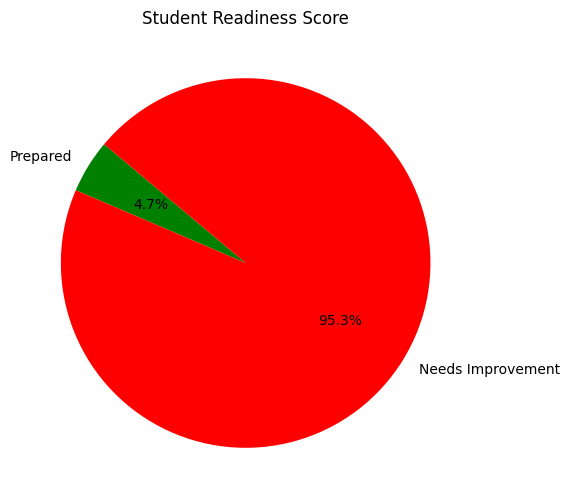

In [2]:
import random
import requests
import speech_recognition as sr
import pyttsx3
import matplotlib.pyplot as plt
from serpapi import GoogleSearch
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import os


engine = pyttsx3.init()
engine.setProperty("rate", 150)

# SerpAPI Key
API_KEY = os.getenv("SERPAPI_KEY")

def fetch_questions_from_web(course_title):
    params = {
        "q": f"{course_title} important questions",
        "api_key": API_KEY,
        "num": 5
    }
    
    search = GoogleSearch(params)
    results = search.get_dict()
    
    questions = []
    for result in results.get("organic_results", []):
        questions.append(result.get("title")) 
    
    return questions if questions else ["No questions found."]

# Function to scrape an answer from the web
def scrape_answer(question):
    params = {
        "q": question,
        "api_key": API_KEY,
        "num": 1
    }
    
    search = GoogleSearch(params)
    results = search.get_dict()
    
    for result in results.get("organic_results", []):
        return result.get("snippet") 
    
    return "No answer found."

def evaluate_answer(student_answer, correct_answer):
    vectorizer = TfidfVectorizer()
    vectors = vectorizer.fit_transform([student_answer, correct_answer])
    similarity = cosine_similarity(vectors[0], vectors[1])
    
    return similarity[0][0] * 100 

def display_readiness_score(score):
    labels = ['Prepared', 'Needs Improvement']
    sizes = [score, 100 - score]
    colors = ['green', 'red']
    
    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title("Student Readiness Score")
    plt.show()

def speak(text):
    engine.say(text)
    engine.runAndWait()

def get_voice_input():
    recognizer = sr.Recognizer()
    with sr.Microphone() as source:
        print("\nSpeak your answer...")
        recognizer.adjust_for_ambient_noise(source)
        audio = recognizer.listen(source)
        
        try:
            text = recognizer.recognize_google(audio)
            print(f"Your Answer: {text}")
            return text
        except sr.UnknownValueError:
            print("Sorry, I could not understand.")
            return ""
        except sr.RequestError:
            print("Error with the speech recognition service.")
            return ""

course_title = "Machine Learning"

questions = fetch_questions_from_web(course_title)
if questions[0] == "No questions found.":
    speak("No questions found for this topic.")
else:
    question = random.choice(questions)
    print(f"\nQuestion: {question}")

    speak(f"Here is your question: {question}")

    student_answer = get_voice_input()

    if student_answer:
        correct_answer = scrape_answer(question)

        print(f"\nCorrect Answer (Extracted): {correct_answer[:200]}...")
        speak(f"The correct answer is: {correct_answer[:200]}.")

        score = evaluate_answer(student_answer, correct_answer)

        print(f"\nReadiness Score: {score:.2f}%")
        speak(f"Your readiness score is {score:.2f} percent.")

        display_readiness_score(score)
